<a href="https://colab.research.google.com/github/bgohrani/Machine_Learning_Basics/blob/main/5.%20Ensemble_Learning_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier


import tensorflow as tf
import keras

#Importing essential Libraries

In [2]:
moons_data,moons_target = sklearn.datasets.make_moons(noise=0.23, n_samples = 5000)

#Generating Moons dataset for use in classifiers

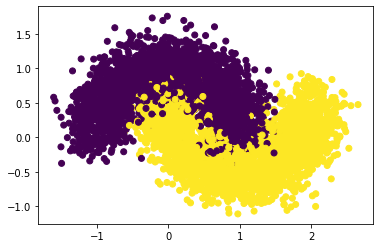

In [3]:
plt.scatter(moons_data[:,0],moons_data[:,1],c=moons_target)
plt.show()

#Visualization

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(moons_data,moons_target, test_size=0.04, random_state=0, stratify=moons_target)

#We want to split the data, and use train_test_split, setting a test_size and dividing such that the distribution of targets remains the same

In [80]:
log_clf = LogisticRegression()
random_clf = RandomForestClassifier()
svm_clf = SVC()

#We create three different types of models, logistic, Random_forest and Support Vector Machines

In [81]:
voting_clf = VotingClassifier(
    estimators = [('l_clf',log_clf),('r_clf',random_clf),('s_clf',svm_clf)], voting='hard'
)

#Using Voting classifier, we can combine the results of these classifiers for prediction
#If voting=hard, the predicted labels are taken and the majority is chosen
#If voting=soft, the probabilities are averaged and the highest is chosen

In [82]:
for clf in [log_clf, random_clf,svm_clf,voting_clf]:
  clf.fit(X_train, Y_train)
  pred_data = clf.predict(X_test)
  print(clf,accuracy_score(Y_test,pred_data))

#Comparing predictions of all classifiers, we can see that the combined one outperforms all
#This difference would be higher if the given data was larger and irregular

LogisticRegression() 0.87
RandomForestClassifier() 0.965
SVC() 0.975
VotingClassifier(estimators=[('l_clf', LogisticRegression()),
                             ('r_clf', RandomForestClassifier()),
                             ('s_clf', SVC())]) 0.975


In [ ]:
decision_tree_clf = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators= 500,n_jobs=-1)

#We want to use another technique called as Bagging, where training is done with many classifiers of the same type
#Each is trained on different subsets of data
#The result is then some form of aggregation of the classifier outputs
#n_jobs=-1 tells the system to use all available cores for training classifiers simultaneously

In [ ]:
decision_tree_clf.fit(X_train,Y_train)
bagging_clf.fit(X_train,Y_train)

decision_tree_pred = decision_tree_clf.predict(X_test)
bagging_clf_pred = bagging_clf.predict(X_test)

print('Decision Tree', accuracy_score(Y_test,decision_tree_pred))
print('Bagging',accuracy_score(Y_test,bagging_clf_pred))

#We train on a single classifier as well as the ensemble bagging classifier and see the accuracy

Decision Tree 0.9376
Bagging 0.9456


In [ ]:
X = np.linspace(-2,3,1000)
Y = np.linspace(-1.5,2,1000)
XX,YY = np.meshgrid(X,Y)
contour_X = np.c_[XX.reshape(-1),YY.reshape(-1)]

#We want to see how well the decision boundary has been made 
#We use contour plots for the bagging classifier and the decision tree

In [ ]:
decision_tree_contour = decision_tree_clf.predict(contour_X)
bagging_contour = bagging_clf.predict(contour_X)

#Predicting on the entire 2x2 grid 

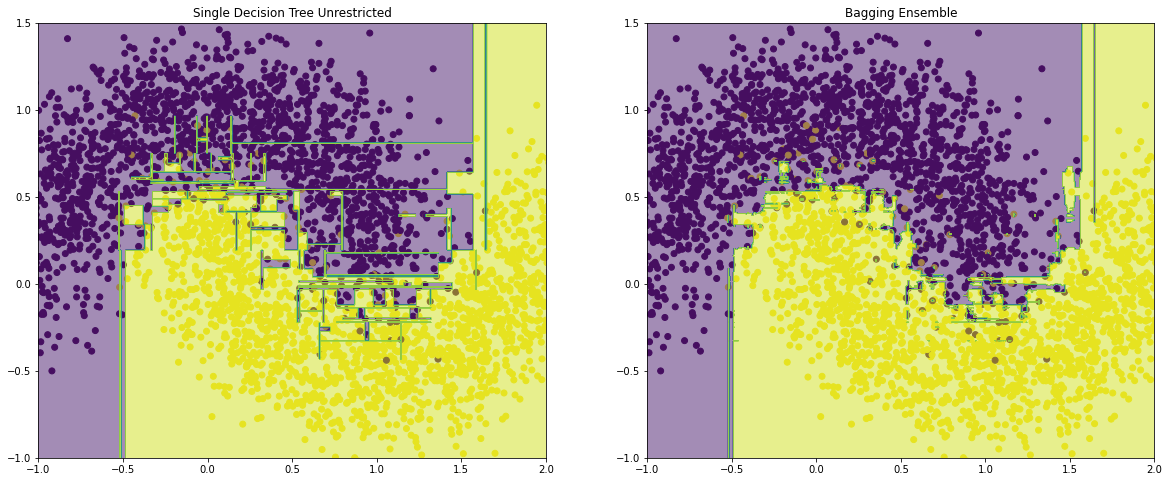

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.contourf(XX,YY,decision_tree_contour.reshape(1000,1000),alpha=0.5)
plt.title('Single Decision Tree Unrestricted')
plt.xlim(-1,2)
plt.ylim(-1,1.5)

plt.subplot(1,2,2)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.contourf(XX,YY,bagging_contour.reshape(1000,1000),alpha=0.5)
plt.title('Bagging Ensemble')

plt.xlim(-1,2)
plt.ylim(-1,1.5)
plt.show()

#Plotting the results in 2 subplots
#The single tree has overfit the data but the bagging classifier has better results and generalizes better

In [ ]:
random_forest_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
random_forest_clf.fit(X_train,Y_train)
print('Accuracy',accuracy_score(Y_test,random_forest_clf.predict(X_test)))

#The same decision trees bagging classifier can also be created with Random Forests
#These are more convenient and optimized to use decision trees
#We initialize, train and predict as usual

Accuracy 0.9512


In [ ]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)

#Now we want to see the relative importances of different features towards the classification
#Some features are generally more sensitive when it comes to prediction
#We want to visualize and see how this works, so we load the MNIST data and reshape it to 2 dimensions

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
random_forest_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
random_forest_clf.fit(X_train_reshaped,Y_train)

#We fit this data to a RandomForestClassifier, same as earlier

RandomForestClassifier(n_estimators=500, n_jobs=-1)

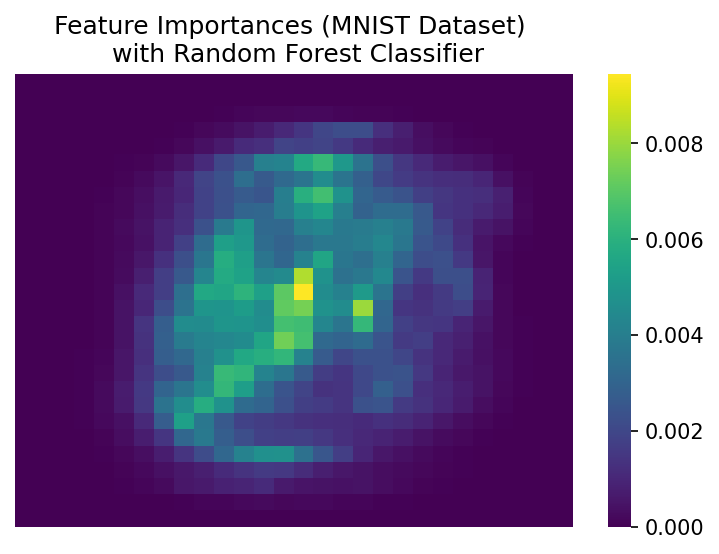

In [ ]:
heatmap = random_forest_clf.feature_importances_
plt.figure(dpi=150)
sns.heatmap(heatmap.reshape(28,28),cmap='viridis')
plt.axis('off')
plt.title('Feature Importances (MNIST Dataset) \n with Random Forest Classifier')
plt.show()

#We can use the feature_importances_ attribute to extract this information
#This information can then be visualized in the form of a Heatmap

In [ ]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=200,algorithm='SAMME.R', learning_rate=0.5)

#Adaboost is another method that is commonly used
#Here Several single depth decision trees are used 
#The algorithm works in such a manner that the misclassified instances at the previous classifier are given higher weights in the current one
#Thus, each features importance can be captured by some or the other classifier
#The predictions are made in the same manner as bagging or pasting

In [ ]:
moons_data,moons_target = sklearn.datasets.make_moons(noise=0.23, n_samples = 5000)
X_train, X_test, Y_train, Y_test = train_test_split(moons_data,moons_target, test_size=0.25, random_state=0, stratify=moons_target)

#Creating moons data like before 

In [ ]:
ada_clf.fit(X_train,Y_train)

#Training the moons data on the classifier

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

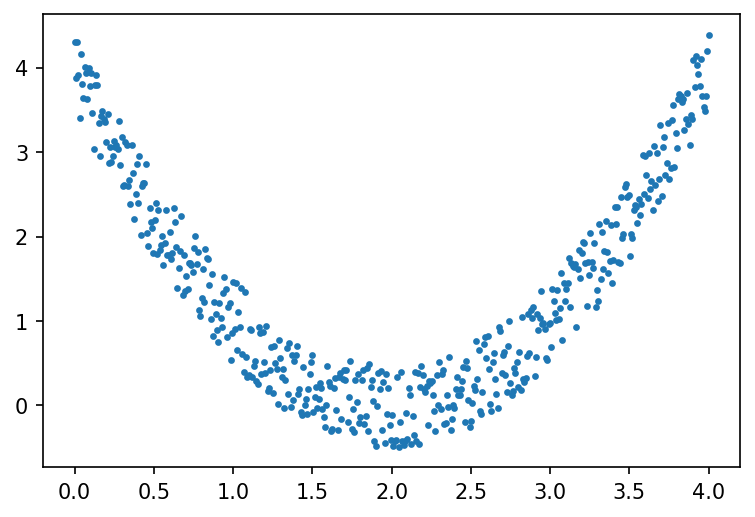

In [ ]:
X_train = np.linspace(0,4,500)
Y_train_clean = (X_train-2)**2
noise = np.random.random(500) - 0.5
Y_train = Y_train_clean + noise

plt.figure(dpi=150)
plt.scatter(X_train,Y_train,s=5)
plt.show()

#Here we want to try another method called Gradient Boosting
#In this the initial classifier is trained on the dataset, whereas the subsequent ones are trained on the residual errors made by the previous ones
#We generate non-linear data for this purpose and visualize it 

In [ ]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg3 = DecisionTreeRegressor(max_depth=2)


tree_reg1.fit(X_train.reshape(-1,1),Y_train)
Y_train2 = Y_train - tree_reg1.predict(X_train.reshape(-1,1))
tree_reg2.fit(X_train.reshape(-1,1),Y_train2)
Y_train3 = Y_train2 - tree_reg2.predict(X_train.reshape(-1,1))
tree_reg3.fit(X_train.reshape(-1,1),Y_train3)


Y_pred1 = tree_reg1.predict(X_train.reshape(-1,1))
Y_pred2 = tree_reg1.predict(X_train.reshape(-1,1)) + tree_reg2.predict(X_train.reshape(-1,1))
Y_pred3 = tree_reg1.predict(X_train.reshape(-1,1)) + tree_reg2.predict(X_train.reshape(-1,1)) + tree_reg3.predict(X_train.reshape(-1,1))

#We create three decision tree classifiers and train each of them with the method discussed above 
#We can make new predictions by just aggregating the predictions of each of the classes
#We use Y_pred1, Y_pred2 and Y_pred3 to illustrate this idea, and show how gradient boosting works

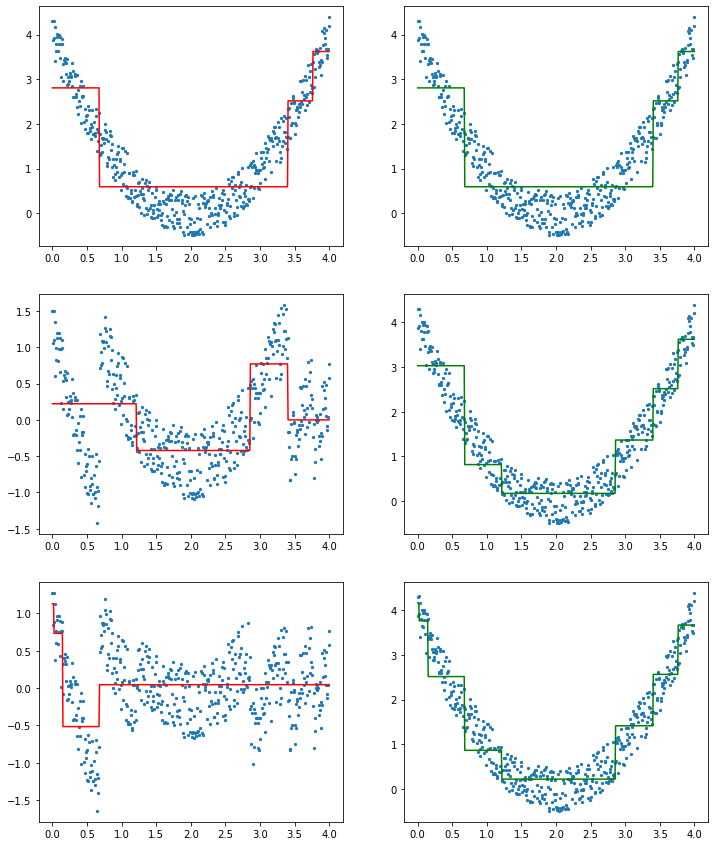

In [ ]:
plt.figure(figsize=(12,15))

plt.subplot(3,2,1)
plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,tree_reg1.predict(X_train.reshape(-1,1)),'r')

plt.subplot(3,2,2)
plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,Y_pred1,'g')

plt.subplot(3,2,3)
plt.scatter(X_train,Y_train2,s=5)
plt.plot(X_train,tree_reg2.predict(X_train.reshape(-1,1)),'r')

plt.subplot(3,2,4)
plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,Y_pred2,'g')

plt.subplot(3,2,5)
plt.scatter(X_train,Y_train3,s=5)
plt.plot(X_train,tree_reg3.predict(X_train.reshape(-1,1)),'r')

plt.subplot(3,2,6)
plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,Y_pred3,'g')


plt.show()

#We create 6 plots, the left one showing the training data and the prediction for each classifier
#The right plots show the aggregate predictions for all the classfiers upto that step
#The right classifiers show that with more classifiers being added, the predictions improve

In [ ]:
grbt_reg_low_n = GradientBoostingRegressor(n_estimators=3, learning_rate=1,max_depth=2)
grbt_reg_low_n.fit(X_train.reshape(-1,1),Y_train)

grbt_reg_high_n = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,max_depth=2)
grbt_reg_high_n.fit(X_train.reshape(-1,1),Y_train)

#We can also use GradientBoostingRegressor to implement this
#We show two models having different number of classifiers within

GradientBoostingRegressor(max_depth=2, n_estimators=200)

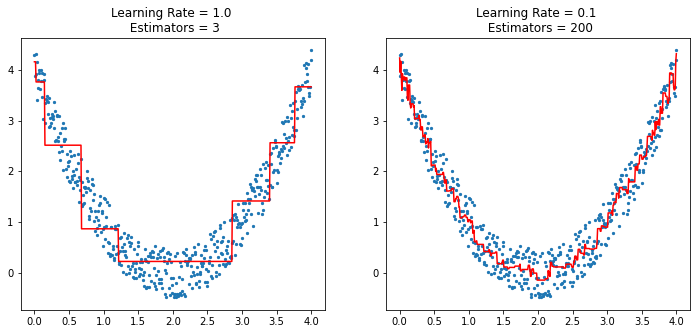

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,grbt_reg_low_n.predict(X_train.reshape(-1,1)),'r')
plt.title('Learning Rate = 1.0 \n Estimators = 3')

plt.subplot(1,2,2)
plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,grbt_reg_high_n.predict(X_train.reshape(-1,1)),'r')
plt.title('Learning Rate = 0.1 \n Estimators = 200')

plt.show()

#Visualizing the predictions of these two classfiers, with more estimators, quality improves

In [ ]:
X_train_new,X_test,Y_train_new,Y_test = train_test_split(X_train,Y_train, test_size=0.2)

#Splitting this quadratic data into training and testing

In [ ]:
grbt_reg = GradientBoostingRegressor(max_depth=2, n_estimators=200)
grbt_reg.fit(X_train_new.reshape(-1,1),Y_train_new)

errors = [mean_squared_error(Y_test,Y_pred) for Y_pred in grbt_reg.staged_predict(X_test.reshape(-1,1))]
best_estimators = np.argmin(errors)

#We want to determine what the best number of estimators are
#Staged_predict helps us do this, we can determine the error at each iteration and see where we get the minimum is
#We plot the error at each value and choose the minimum

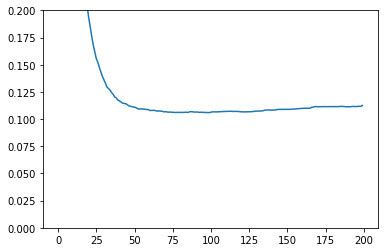

In [ ]:
plt.plot(errors)
plt.ylim(0,0.2)
plt.show()

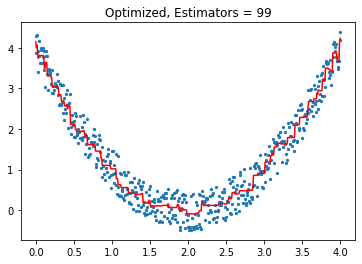

In [ ]:
grbt_optimized =  GradientBoostingRegressor(max_depth=2, n_estimators=best_estimators)
grbt_optimized.fit(X_train.reshape(-1,1),Y_train)

plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,grbt_optimized.predict(X_train.reshape(-1,1)), 'r')
plt.title('Optimized, Estimators = 99')
plt.show()

#Training the gradient boosting regressor with the optimal number of estimators and visualizing its predictions and results